실무에서 나올법한 데이터를 깔금하게 처리하는 과정을 melt로 해보기

In [2]:
import pandas as pd

In [8]:
import os

In [9]:
root_path = "dataset"
os.listdir(root_path)

['01_Contract_Data.csv',
 '02_VIP_member_Data.csv',
 '03_Delivery.csv',
 '04_store_member.csv',
 '04_store_product_1.csv',
 '05_Stack.xlsx',
 '2016_health_checkup_1.csv',
 '2016_health_checkup_2.csv',
 '2016_health_checkup_3.csv',
 '2016_health_checkup_4.csv']

- pivot 된거랑 비슷하다
- 실제 유통과정에서 발생한 데이터이다.
- 날짜 데이터들이 누워있다.
> 누워있는 데이터를 항목별로 나눠서 데이터를 다시 정리해보자. 이 때 사용되는 것이 melt이다.

In [17]:
# csv 파일은 read_csv로
# xlsx 파일은 read_excel로 불러온다.
pd.read_excel('dataset/05_Stack.xlsx')

# 컬럼명이 이상하다: 정상, 불용 합계 -> 심각하다
# 구분, 카테고리명, 자재그룹... 은 항목명으로 만들어야 하고
# 날짜 값들은 새로운 컬럼을 만들어서 정리를 해줘야 한다. 
# 그래야 Python을 사용해서 분석 및 시각화가 가능하다.

# 실무에서 데이터를 불러오면 50%이상 이런 데이터이다.
# 이런 경우에는, 데이터를 처리하고 분석을 진행해야 한다.
# 이게 실무자에게 굉장히 도움이될 수 있는 내용이다.

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,정상,정상.1,정상.2,...,불용,불용.1,불용.2,불용.3,합계,합계.1,합계.2,합계.3,Unnamed: 23,
0,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,...,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,안전재고,분류
1,구분,CHB,1687,친환경 바디워시,A,천원,0,0,0,0,...,98.8,0,0,0,98.8,0,0,0,0,E
2,구분,CHB,1687,친환경 바디워시,B,천원,0,0,0,0,...,393.7,0,0,0,393.7,0,0,0,0,E
3,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,9474.3,9741.7,6965.7,...,6.4,0,6.4,0,9480.7,9741.7,6972,3368.2,0,A
4,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,7702.6,6117.1,4009.9,...,7.7,10.2,0,10.2,7710.3,6127.3,4009.9,2680.1,0,A
5,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,56309.6,78268,74942.2,...,293,0,0,277.2,56602.6,78268,74942.2,84967.2,39593.3,A
6,구분,CHB,1687,친환경 바디워시,F,천원,3339.9,3181.8,7674,3710.2,...,0,6,179.1,0,3181.8,7680,3889.3,8294.9,0,A
7,구분,CHB,1687,친환경 바디워시,G,천원,2616.8,24351.4,19767.5,18616.7,...,0,0,0,117.7,24351.4,19767.5,18616.7,17138.9,0,M
8,구분,CHB,1687,친환경 바디워시,H,천원,16520.3,26129.3,35423.7,26476.3,...,112.5,0,0,0,26241.8,35423.7,26476.3,60737,46893.9,A
9,구분,CHB,1687,친환경 바디워시,I,천원,11722.5,26550.6,4279.6,15773.6,...,36.1,0,216.9,0,26586.7,4279.6,15990.5,8400.1,0,K


In [20]:
# 정상, 불용..을 제외하고 불러오자
# pd.read_excel(skiprows): 행 생략하고 그 뒤 행부터 컬럼명으로 잡아준다.
pd.read_excel("dataset/05_Stack.xlsx", skiprows=1)
# 불필요한 행 제거

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,...,2019-12-01 00:00:00.2,2020-10-01 00:00:00.2,2020-11-01 00:00:00.2,2020-12-01 00:00:00.2,2019-12-01 00:00:00.3,2020-10-01 00:00:00.3,2020-11-01 00:00:00.3,2020-12-01 00:00:00.3,안전재고,분류
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,0.0,0.0,...,98.8,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,E
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,0.0,0.0,...,393.7,0.0,0.0,0.0,393.7,0.0,0.0,0.0,0.0,E
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,9474.3,9741.7,6965.7,...,6.4,0.0,6.4,0.0,9480.7,9741.7,6972.0,3368.2,0.0,A
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,7702.6,6117.1,4009.9,...,7.7,10.2,0.0,10.2,7710.3,6127.3,4009.9,2680.1,0.0,A
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,56309.6,78268.0,74942.2,...,293.0,0.0,0.0,277.2,56602.6,78268.0,74942.2,84967.2,39593.3,A
5,구분,CHB,1687,친환경 바디워시,F,천원,3339.9,3181.8,7674.0,3710.2,...,0.0,6.0,179.1,0.0,3181.8,7680.0,3889.3,8294.9,0.0,A
6,구분,CHB,1687,친환경 바디워시,G,천원,2616.8,24351.4,19767.5,18616.7,...,0.0,0.0,0.0,117.7,24351.4,19767.5,18616.7,17138.9,0.0,M
7,구분,CHB,1687,친환경 바디워시,H,천원,16520.3,26129.3,35423.7,26476.3,...,112.5,0.0,0.0,0.0,26241.8,35423.7,26476.3,60737.0,46893.9,A
8,구분,CHB,1687,친환경 바디워시,I,천원,11722.5,26550.6,4279.6,15773.6,...,36.1,0.0,216.9,0.0,26586.7,4279.6,15990.5,8400.1,0.0,K
9,구분,CHB,1687,친환경 바디워시,J,천원,100526.4,17334.1,32889.1,16821.8,...,298.1,27.9,0.0,37.3,17632.2,32917.1,16821.8,29750.2,0.0,A


In [26]:
# 미해결 문제는
# "구분	카테고리명	자재그룹	자재그룹명	제품명	단위	판매"
# 까지는 정상적인 컬럼명이지만
# 날짜 데이터가 컬럼명에 누워있다는 점이다.

# 이 날짜 데이터를 뺴서 한줄로 쭉 정렬해놓자.
# 날짜 데이터를 한줄로 뽑아보자. 이때 melt를 사용해서 뽑아낸다.
df1 = pd.read_excel("dataset/05_Stack.xlsx", skiprows=1)
df1

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,...,2019-12-01 00:00:00.2,2020-10-01 00:00:00.2,2020-11-01 00:00:00.2,2020-12-01 00:00:00.2,2019-12-01 00:00:00.3,2020-10-01 00:00:00.3,2020-11-01 00:00:00.3,2020-12-01 00:00:00.3,안전재고,분류
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,0.0,0.0,...,98.8,0.0,0.0,0.0,98.8,0.0,0.0,0.0,0.0,E
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,0.0,0.0,...,393.7,0.0,0.0,0.0,393.7,0.0,0.0,0.0,0.0,E
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,9474.3,9741.7,6965.7,...,6.4,0.0,6.4,0.0,9480.7,9741.7,6972.0,3368.2,0.0,A
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,7702.6,6117.1,4009.9,...,7.7,10.2,0.0,10.2,7710.3,6127.3,4009.9,2680.1,0.0,A
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,56309.6,78268.0,74942.2,...,293.0,0.0,0.0,277.2,56602.6,78268.0,74942.2,84967.2,39593.3,A
5,구분,CHB,1687,친환경 바디워시,F,천원,3339.9,3181.8,7674.0,3710.2,...,0.0,6.0,179.1,0.0,3181.8,7680.0,3889.3,8294.9,0.0,A
6,구분,CHB,1687,친환경 바디워시,G,천원,2616.8,24351.4,19767.5,18616.7,...,0.0,0.0,0.0,117.7,24351.4,19767.5,18616.7,17138.9,0.0,M
7,구분,CHB,1687,친환경 바디워시,H,천원,16520.3,26129.3,35423.7,26476.3,...,112.5,0.0,0.0,0.0,26241.8,35423.7,26476.3,60737.0,46893.9,A
8,구분,CHB,1687,친환경 바디워시,I,천원,11722.5,26550.6,4279.6,15773.6,...,36.1,0.0,216.9,0.0,26586.7,4279.6,15990.5,8400.1,0.0,K
9,구분,CHB,1687,친환경 바디워시,J,천원,100526.4,17334.1,32889.1,16821.8,...,298.1,27.9,0.0,37.3,17632.2,32917.1,16821.8,29750.2,0.0,A


In [27]:
# 제품명, 날짜별 매출액 data만 남기고 나머지 데이터를 빼보자.
# 컬럼명이 뭐가 있는지 확인한다.
df1.columns

Index([                   '구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

- drop : 내가 원하는 col만 남기고 나머지 col을 제거할 떄 사용

' 분류': 분류 앞에 공백이 있다. 이런 경우가 간혹 있다. 공백이 있으면 공백도 넣어줘야 한다.
> 공백이 이름 앞뒤에 있는 경우도 있다.

In [31]:
cols = ['구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                                            '단위',
                          '판매','안전재고',
                         ' 분류' ]
#cols = ['구분','카테고리명','자재그룹','자재그룹명','제품명',                    '단위',
#'판매',  '안전재고',' 분류'] 
df2 = df1.drop(columns=cols)

In [33]:
# 제품명의 val은 정상이다.
# 날짜 데이터가 컬럼 형태로 잡혀있다.
# 이 날짜 데이터를 하나의 항목으로 뽑고
# 판매액도 하나의 항목으로 정렬을 해보자
df2

,제품명,2019-12-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2019-12-01 00:00:00.1,2020-10-01 00:00:00.1,2020-11-01 00:00:00.1,2020-12-01 00:00:00.1,2019-12-01 00:00:00.2,2020-10-01 00:00:00.2,2020-11-01 00:00:00.2,2020-12-01 00:00:00.2,2019-12-01 00:00:00.3,2020-10-01 00:00:00.3,2020-11-01 00:00:00.3,2020-12-01 00:00:00.3
0,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,98.8,0.0,0.0,0.0,98.8,0.0,0.0,0.0
1,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,393.7,0.0,0.0,0.0,393.7,0.0,0.0,0.0
2,C,9474.3,9741.7,6965.7,3368.2,0.0,0.0,0.0,0,6.4,0.0,6.4,0.0,9480.7,9741.7,6972.0,3368.2
3,D,7702.6,6117.1,4009.9,2669.8,0.0,0.0,0.0,0,7.7,10.2,0.0,10.2,7710.3,6127.3,4009.9,2680.1
4,E,56309.6,78268.0,74942.2,84690.1,0.0,0.0,0.0,0,293.0,0.0,0.0,277.2,56602.6,78268.0,74942.2,84967.2
5,F,3181.8,7674.0,3710.2,8294.9,0.0,0.0,0.0,0,0.0,6.0,179.1,0.0,3181.8,7680.0,3889.3,8294.9
6,G,24351.4,19767.5,18616.7,17021.1,0.0,0.0,0.0,0,0.0,0.0,0.0,117.7,24351.4,19767.5,18616.7,17138.9
7,H,26129.3,35423.7,26476.3,60737.0,0.0,0.0,0.0,0,112.5,0.0,0.0,0.0,26241.8,35423.7,26476.3,60737.0
8,I,26550.6,4279.6,15773.6,8400.1,0.0,0.0,0.0,0,36.1,0.0,216.9,0.0,26586.7,4279.6,15990.5,8400.1
9,J,17334.1,32889.1,16821.8,29712.9,0.0,0.0,0.0,0,298.1,27.9,0.0,37.3,17632.2,32917.1,16821.8,29750.2


In [34]:
# 제품명 항목이 나열된다. 
# 아까 col로 잡히던 날짜 데이터들이, 
# variable이라는 col로 들어간 것을 볼 수 있다.
# 제품명과 날짜에 따른 매출액이 value라는 col에 들어갔다.
df2.melt(id_vars=["제품명"])

# melt 기능:
# id_vars를 기준으로
# col에 있는 나머지 값들을 하나의 항목으로 만들고,
# 그리고 그 안에 구성되어 있던 모든 data들을
# value라는 col로 보내버린다.
# 데이터를 이렇게 바꿔준다.
# 날짜별, 판매제품과 매출액이 계산됬다.


# 이소영전무님이 말씀하신 이런 조건일 때 얼마라는걸 찾으라는 건
# 그냥 data만 잘 정리되면 된다. 하나의 row에 정리되기만 하면된다.
# row 하나에 정리를 하라는 뜻이다.

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\4269165432.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df2.melt(id_vars=["제품명"])


,제품명,variable,value
0,A,2019-12-01 00:00:00.000,0.0
1,B,2019-12-01 00:00:00.000,0.0
2,C,2019-12-01 00:00:00.000,9474.3
3,D,2019-12-01 00:00:00.000,7702.6
4,E,2019-12-01 00:00:00.000,56309.6
...,...,...,...
635,Z2,2020-12-01 00:00:00.300,1619.5
636,Z3,2020-12-01 00:00:00.300,3191.2
637,KC,2020-12-01 00:00:00.300,0.0
638,KC2,2020-12-01 00:00:00.300,16845.8


In [36]:
# col 이름을 rename 해보자.
df2.melt(id_vars=["제품명"]).rename(columns={"variable":"일자", "value":"매출액"})

# 이렇게 하면 제품명별 일자별 매출액을 확인할 수 있다.
# 일자 항목은 몇개 없었지만 640 rows로 늘어난 이유는 제품이 많기 때문이다.

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\1205871975.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df2.melt(id_vars=["제품명"]).rename(columns={"variable":"일자", "value":"매출액"})


,제품명,일자,매출액
0,A,2019-12-01 00:00:00.000,0.0
1,B,2019-12-01 00:00:00.000,0.0
2,C,2019-12-01 00:00:00.000,9474.3
3,D,2019-12-01 00:00:00.000,7702.6
4,E,2019-12-01 00:00:00.000,56309.6
...,...,...,...
635,Z2,2020-12-01 00:00:00.300,1619.5
636,Z3,2020-12-01 00:00:00.300,3191.2
637,KC,2020-12-01 00:00:00.300,0.0
638,KC2,2020-12-01 00:00:00.300,16845.8


In [40]:
# 이렇게 데이터를 뽑으면, 
# 제품별 매출액의 추이를 pivot tabel로 계산할 수 있다.
df3 = df2.melt(id_vars=["제품명"]).rename(columns={"variable":"일자", "value":"매출액"})

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\827307936.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df3 = df2.melt(id_vars=["제품명"]).rename(columns={"variable":"일자", "value":"매출액"})


In [41]:
# 제품에 따른 매출액의 평균 계산
df3.pivot_table(index="제품명", values="매출액")

,매출액
제품명,
A,12.35000
A1,0.55000
A2,14893.46250
A3,1292.75625
B,49.21250
B2,1678.07500
B3,4837.86875
C,3695.33125
D,2565.94375


In [42]:
# 천원 단위이므로 8.8은 8800원을 나타낸다.
df3.pivot_table(index="제품명", values="매출액", aggfunc="sum")

,매출액
제품명,
A,197.6
A1,8.8
A2,238295.4
A3,20684.1
B,787.4
B2,26849.2
B3,77405.9
C,59125.3
D,41055.1


### 중간 결론

아까는 날짜가 col로 들어가 있어서 분석하기가 불편했다.하지만 위와 같은 방법으로 매출액 항목을 만들면 그 때부터 다양한 분석이 가능하다.

- melt를 사용해서 매출액을 한줄로 정리해서 시각화가 쉽게 가능하다.

In [43]:
#시각화
import seaborn as sns
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")

<Axes: xlabel='제품명', ylabel='매출액'>

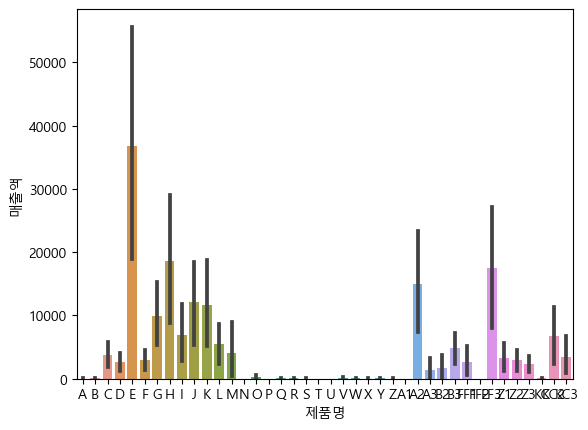

In [44]:
# 제품별 매출액: raw data로는 이런 시각화가 불가능했다.
sns.barplot(data=df3, x="제품명", y="매출액")

- 제품명에 대해서만 해봣다.
- 다른 항목에 대해서도 해보자

In [45]:
df1.columns

Index([                   '구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

In [46]:
# 이미 잘 정렬되어 있는 구분, 카테고리명 같은 col을 갖고
# 날짜 col과 날짜 col 안에 있는 매출액 data를 바꿔보자.
# 얘네를 id_vars에 넣을 lst에 다 집어 넣으면 된다.

In [47]:
# 날짜별 매출액의 추이 계산: 
# 날짜별로 매출액 항목은 따로 한 col로 계산 되어 나왔다.
df1.melt(id_vars=['구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매','안전재고',
                         ' 분류'])

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\3542665831.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df1.melt(id_vars=['구분',                 '카테고리명',


,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,variable,value
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00.000,9474.3
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00.000,7702.6
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00.000,56309.6
...,...,...,...,...,...,...,...,...,...,...,...
635,구분,CHB,1687,친환경 바디워시,Z2,천원,5012.4,0.0,K,2020-12-01 00:00:00.300,1619.5
636,구분,CHB,1687,친환경 바디워시,Z3,천원,585.0,0.0,K,2020-12-01 00:00:00.300,3191.2
637,구분,CHB,1687,친환경 바디워시,KC,천원,0.0,0.0,E,2020-12-01 00:00:00.300,0.0
638,구분,CHB,1687,친환경 바디워시,KC2,천원,16636.2,0.0,L,2020-12-01 00:00:00.300,16845.8


In [49]:
# 정렬 되어 있던 항목들은 그래도 냅두고
# 컬럼으로 되어 있던 날짜 데이터만 
# 일자 항목으로 잡아주고, 
# 매출액도 하나의 항목으로 
# 정리를 해서 640개 데이터를 확보했다.
# 그리고 얘를 새로운 변수로 선언해서 사용하면 된다.
df3 = df1.melt(id_vars=['구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매','안전재고',
                         ' 분류']).rename(columns={"variable":"일자", "value":"매출액"})

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2135523075.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df3 = df1.melt(id_vars=['구분',                 '카테고리명',


In [50]:
# 이제 이 data는 우리가 앞에서 연습한 data와 비슷한 형태가 되었다.
df3

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,일자,매출액
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00.000,9474.3
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00.000,7702.6
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00.000,56309.6
...,...,...,...,...,...,...,...,...,...,...,...
635,구분,CHB,1687,친환경 바디워시,Z2,천원,5012.4,0.0,K,2020-12-01 00:00:00.300,1619.5
636,구분,CHB,1687,친환경 바디워시,Z3,천원,585.0,0.0,K,2020-12-01 00:00:00.300,3191.2
637,구분,CHB,1687,친환경 바디워시,KC,천원,0.0,0.0,E,2020-12-01 00:00:00.300,0.0
638,구분,CHB,1687,친환경 바디워시,KC2,천원,16636.2,0.0,L,2020-12-01 00:00:00.300,16845.8


In [55]:
# 날짜 데이터를 보면 바로 타입 확인하고 dt로 바꾼다.
df3["일자(dt)"] = pd.to_datetime(df3["일자"])
df3["연도"] = df3["일자(dt)"].dt.year
df3["월"] = df3["일자(dt)"].dt.month

In [56]:
# 이걸로 pivot tabel을 사용하면 연도별 월별 매출액을 볼 수 있다.
df3

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,일자,매출액,일자(dt),연도,월
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0,2019-12-01 00:00:00.000,2019,12
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0,2019-12-01 00:00:00.000,2019,12
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00.000,9474.3,2019-12-01 00:00:00.000,2019,12
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00.000,7702.6,2019-12-01 00:00:00.000,2019,12
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00.000,56309.6,2019-12-01 00:00:00.000,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,구분,CHB,1687,친환경 바디워시,Z2,천원,5012.4,0.0,K,2020-12-01 00:00:00.300,1619.5,2020-12-01 00:00:00.300,2020,12
636,구분,CHB,1687,친환경 바디워시,Z3,천원,585.0,0.0,K,2020-12-01 00:00:00.300,3191.2,2020-12-01 00:00:00.300,2020,12
637,구분,CHB,1687,친환경 바디워시,KC,천원,0.0,0.0,E,2020-12-01 00:00:00.300,0.0,2020-12-01 00:00:00.300,2020,12
638,구분,CHB,1687,친환경 바디워시,KC2,천원,16636.2,0.0,L,2020-12-01 00:00:00.300,16845.8,2020-12-01 00:00:00.300,2020,12


In [58]:
# 사실 raw data는 연도별 월별로 매출액을 나름대로 정리해놓은 데이터이다.
# 하지만 저런 형태는 Python에서 보기가 어렵다. 
# 따라서 df3와 같이 바꿔야 한다.

In [60]:
# 연도별, 월별 매출액 합
df3.pivot_table(index=["연도", "월"], values="매출액", aggfunc="sum")

매출액
연도   월           
2019 12  656733.9
2020 10  821725.0
     11  585380.1
     12  769799.9

In [61]:
# 제품명을 column이나 index에 넣는다.
df3.pivot_table(index=["연도", "월"], values="매출액", aggfunc="sum", columns="제품명")

제품명          A   A1       A2       A3      B       B2       B3        C  \
연도   월                                                                    
2019 12  197.6  8.8  36546.0  20564.1  787.4   1039.0  19498.5  18961.4   
2020 10    0.0  0.0  77843.2     40.0    0.0   2356.8  24025.6  19483.4   
     11    0.0  0.0  55878.8     40.0    0.0    240.8  18963.8  13944.1   
     12    0.0  0.0  68027.4     40.0    0.0  23212.6  14918.0   6736.4   

제품명            D         E  ...     T     U       V      W      X       Y  \
연도   월                      ...                                             
2019 12  15420.6  113205.2  ...  63.6  38.0  1487.8  796.7  199.8  1108.3   
2020 10  12254.6  156536.0  ...   0.0   0.0     0.0    0.0    0.0     0.0   
     11   8019.8  149884.4  ...   0.0   0.0     0.0    0.0    0.0     0.0   
     12   5360.1  169934.5  ...   0.0   0.0     0.0    0.0    0.0     0.0   

제품명          Z       Z1       Z2       Z3  
연도   월                                     
2019 12  165.4      0.0  19340.4  16074.8  
2020 10    0.0  23928.4  12713.7   7966.2  
     11    0.0  16135.6  10684.8   7174.4  
     12    0.0  12836.4   3239.0   6382.4  

[4 rows x 40 columns]

In [ ]:
# 실무에서 data가 아무리 엉망으로 뽑히더라도
# pivot_table과 melt만 잘 다룰줄 알면 데이터를 자유자재로 바꿀 수 있다.

### viz

<Axes: xlabel='연도', ylabel='매출액'>

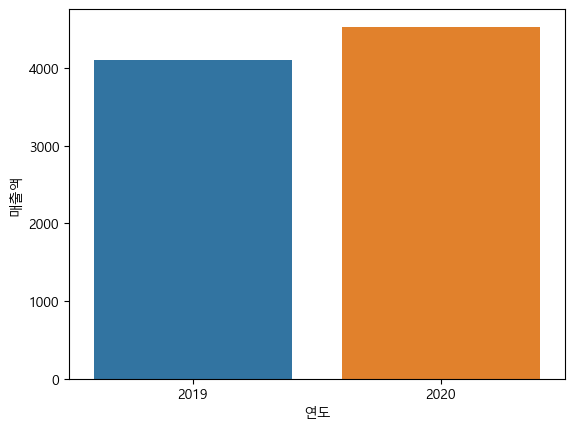

In [63]:
# ci 대신 errorbar 사용해도 same effect
# sns.barplot(data=df3, x="연도", y="매출액", ci=None)
# sns.barplot(data=df3, x="연도", y="매출액", errorbar=None)
sns.barplot(data=df3, x="연도", y="매출액", errorbar=None)

<Axes: xlabel='월', ylabel='매출액'>

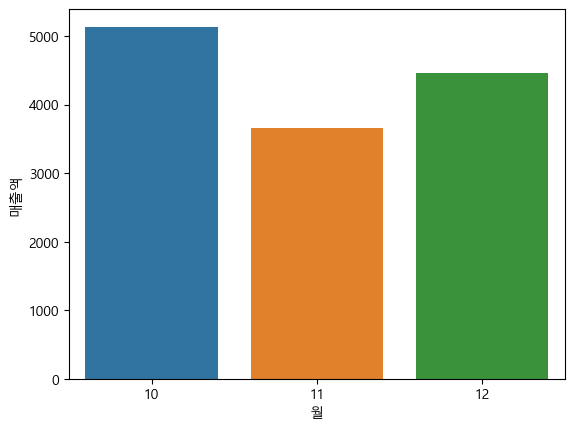

In [64]:
sns.barplot(data=df3, x="월", y="매출액", errorbar=None)

<Axes: xlabel='월', ylabel='매출액'>

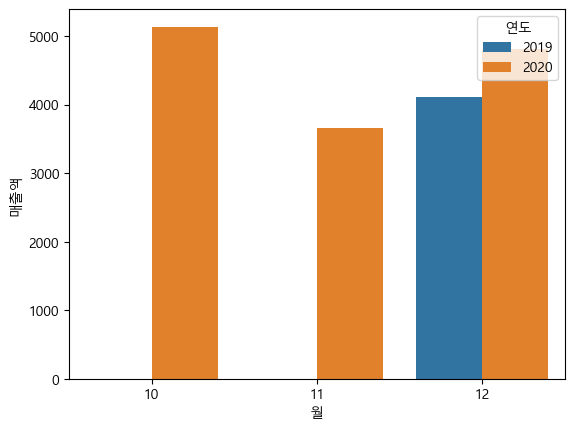

In [66]:
# 10월 11월은 20년도 데이터만 있다. 
# 12월만 19년도 20년도 데이터가 있다.
# 따라서 12월만 매출액을 비교할 수 있다.
sns.barplot(data=df3, x="월", y="매출액", hue="연도", errorbar=None)

In [67]:
# 12월만 19년도 20년도 데이터가 있다.
# 12월 데이터만 뽑아서, 19년도 20년도 매출액의 증감을 비교해볼 수 있다.

In [70]:
# 12월 데이터만 뽑기
cond1 = (df3["월"] == 12)
df3.loc[cond1]

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,일자,매출액,일자(dt),연도,월
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0,2019-12-01 00:00:00.000,2019,12
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01 00:00:00.000,0.0,2019-12-01 00:00:00.000,2019,12
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00.000,9474.3,2019-12-01 00:00:00.000,2019,12
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00.000,7702.6,2019-12-01 00:00:00.000,2019,12
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00.000,56309.6,2019-12-01 00:00:00.000,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,구분,CHB,1687,친환경 바디워시,Z2,천원,5012.4,0.0,K,2020-12-01 00:00:00.300,1619.5,2020-12-01 00:00:00.300,2020,12
636,구분,CHB,1687,친환경 바디워시,Z3,천원,585.0,0.0,K,2020-12-01 00:00:00.300,3191.2,2020-12-01 00:00:00.300,2020,12
637,구분,CHB,1687,친환경 바디워시,KC,천원,0.0,0.0,E,2020-12-01 00:00:00.300,0.0,2020-12-01 00:00:00.300,2020,12
638,구분,CHB,1687,친환경 바디워시,KC2,천원,16636.2,0.0,L,2020-12-01 00:00:00.300,16845.8,2020-12-01 00:00:00.300,2020,12


In [73]:
# 뒤에다가 바로 pivot table을 이어서 한다.
# 연도별 매출액 증감 확인
df4 = df3.loc[cond1].pivot_table(index="제품명", values="매출액", columns="연도", aggfunc="sum")
df4

연도,2019,2020
제품명,,
A,197.6,0.0
A1,8.8,0.0
A2,36546.0,68027.4
A3,20564.1,40.0
B,787.4,0.0
B2,1039.0,23212.6
B3,19498.5,14918.0
C,18961.4,6736.4
D,15420.6,5360.1


In [74]:
# 19년 대비 20년에 얼마나 늘었는가?
df4["증감액"] = df4[2020] - df4[2019]

In [76]:
# (전년도대비)증감률: 증감액 / 합
df4["증감률"] = df4["증감액"] / (df4[2020] + df4[2019])

In [77]:
df4

연도,2019,2020,증감액,증감률
제품명,,,,
A,197.6,0.0,-197.6,-1.000000
A1,8.8,0.0,-8.8,-1.000000
A2,36546.0,68027.4,31481.4,0.301046
A3,20564.1,40.0,-20524.1,-0.996117
B,787.4,0.0,-787.4,-1.000000
B2,1039.0,23212.6,22173.6,0.914315
B3,19498.5,14918.0,-4580.5,-0.133090
C,18961.4,6736.4,-12225.0,-0.475722
D,15420.6,5360.1,-10060.5,-0.484127


In [80]:
# 여기에서 매출액이 가장 많이 제품을 확인해보자: sort values 사용
# 전년도에 매출액이 없던 제품에 대해서는 증감률이 100%로 나온다.
# 따라서 증감률이 100% 미만인 제품만 본다.
# 증감률 -1: 작년까지는 판매했지만 올해는 판매하지 않은 제품의 증감률

# M, B 제품은 전년도 대비 증감률이 90% 이상

# 하락세를 보이는 제품들도 확인을 해볼 수 있다.

df4.sort_values(by="증감률", ascending=False)

연도,2019,2020,증감액,증감률
제품명,,,,
KC3,0.0,1623.8,1623.8,1.000000
Z1,0.0,12836.4,12836.4,1.000000
KC2,0.0,33691.6,33691.6,1.000000
M,28.0,52995.0,52967.0,0.998944
B2,1039.0,23212.6,22173.6,0.914315
F,6363.6,16589.8,10226.2,0.445520
H,52483.6,121474.0,68990.4,0.396593
A2,36546.0,68027.4,31481.4,0.301046
J,35264.4,59500.4,24236.0,0.255749


In [81]:
# 이런 식으로 회사 erp에 있는 복잡하고 이상한 형태의 데이터를
# 위와 같이 깔금하게 정리를 할 수 있다. 
# melt


# 앞에서 배운 함수들을 잘 조합해서 
# 데이터를 원하는 형태로 분석을 해줄 수 있다.


# 데이터의 구조적인 관점에서 전처리하는 방법


# chapter의 마지막 section은 : 실전 연습